In [1]:
#loading the model

from src.models.models import get_efficientnet_b0_model, get_efficientnet_b1_model, get_efficientnet_b2_model, get_efficientnet_b3_model, get_efficientnet_b4_model
from pathlib import Path
import os

model_b0_adam, model_b0_transforms = get_efficientnet_b0_model()
model_b0_sgd, model_b0_transforms = get_efficientnet_b0_model()
model_b1_adam, model_b1_transforms = get_efficientnet_b1_model()
model_b1_sgd, model_b1_transforms = get_efficientnet_b1_model()
model_b2_adam, model_b2_transforms = get_efficientnet_b2_model()
model_b2_sgd, model_b2_transforms = get_efficientnet_b2_model()
model_b3_adam, model_b3_transforms = get_efficientnet_b3_model()
model_b3_sgd, model_b3_transforms = get_efficientnet_b3_model()
model_b4_adam, model_b4_transforms = get_efficientnet_b4_model()
model_b4_sgd, model_b4_transforms = get_efficientnet_b4_model()


models = [model_b0_adam, model_b0_sgd,
           model_b1_adam, model_b1_sgd,
           model_b2_adam, model_b2_sgd,
           model_b3_adam, model_b3_sgd,
           model_b4_adam, model_b4_sgd]

models_dir = Path('trained_models')
model_names = os.listdir(models_dir)
model_save_paths = [models_dir/i for i in model_names]




In [2]:
model_save_paths

[WindowsPath('trained_models/efficientnet_b0_adam.pth'),
 WindowsPath('trained_models/efficientnet_b0_sgd.pth'),
 WindowsPath('trained_models/efficientnet_b1_adam.pth'),
 WindowsPath('trained_models/efficientnet_b1_sgd.pth'),
 WindowsPath('trained_models/efficientnet_b2_adam.pth'),
 WindowsPath('trained_models/efficientnet_b2_sgd.pth'),
 WindowsPath('trained_models/efficientnet_b3_adam.pth'),
 WindowsPath('trained_models/efficientnet_b3_sgd.pth'),
 WindowsPath('trained_models/efficientnet_b4_adam.pth'),
 WindowsPath('trained_models/efficientnet_b4_sgd.pth')]

In [3]:
import torch

for model_path, model in zip(model_save_paths, models):
    model.load_state_dict(torch.load(model_path))

In [5]:
# testing the accuracy on the test dataset to confirm that models are predicting well
from src.preprocessing.transforms_data import data_transformations

train_dir = Path("data") / "Train_300x300"
test_dir = Path("data") / "Test_300x300"

data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b0_transforms)
_, _, test_dataloader_b0 = data.get_dataloaders()

data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b1_transforms)
_, _, test_dataloader_b1 = data.get_dataloaders()

data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b2_transforms)
_, _, test_dataloader_b2 = data.get_dataloaders()

data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b3_transforms)
_, _, test_dataloader_b3 = data.get_dataloaders()

data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b4_transforms)
_, _, test_dataloader_b4 = data.get_dataloaders()

In [7]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
for model in models:
    model.to(device)

In [8]:
from src.models.models import test_models

test_dataloaders = [test_dataloader_b0, test_dataloader_b0,
                    test_dataloader_b1, test_dataloader_b1,
                    test_dataloader_b2, test_dataloader_b2,
                    test_dataloader_b3, test_dataloader_b3,
                    test_dataloader_b4, test_dataloader_b4]
majority_prediction, all_prediction = test_models(models, test_dataloaders=test_dataloaders)


Number of samples where no majority was found (output -5): 0
Ensemble accuracy with majority vote and confidence threshold: 0.7053


In [1]:
import random
import os
from PIL import Image
from pathlib import Path
from src.models.model_predict import ensemble_predict

data_path = Path('data/Test_300x300')

cl = '2'
img_file = random.choice(os.listdir(data_path/cl))
img = Image.open(data_path/cl/img_file)
model_preds, major_vote = ensemble_predict(img=img)

In [2]:
model_preds, major_vote

({'Good': 5, 'Fair': 5}, 'Good')

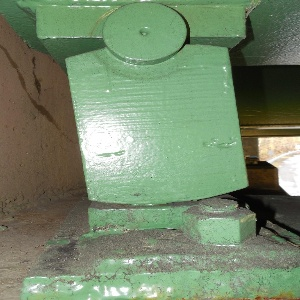

In [3]:
img

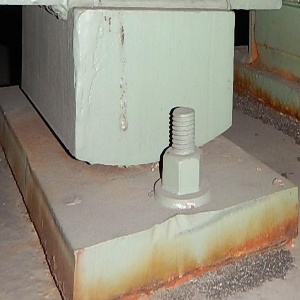

In [54]:
img

In [1]:
import gradio as gr

c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import gradio as gr
import os
from pathlib import Path
from src.models.model_predict import ensemble_predict

# Title and description
title = "Bridge Bearing Condition State Classification Model 🌉"
description = "An ensemble model consisting of 10 EfficientNet Models"
example_list = [str(Path("example_bearings") / f) for f in os.listdir(Path("example_bearings"))]

# Gradio demo
demo = gr.Interface(
    fn=ensemble_predict, 
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Label(num_top_classes=4, label="All 10 Model Predictions (%)"),  # shows {'Good':7, 'Fair':3}
        gr.Textbox(label="Majority Prediction")            # shows "Good"
    ],
    examples=example_list,
    title=title,
    description=description,
)

# Launch
demo.launch(debug=False, share=False)


c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
